In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('AmesHousing.csv')

# Preprocessing

In [2]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# Let's check for missing values ( need to use option context to show all rows here)
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

order                 0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        490
lot_area              0
street                0
alley              2732
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type       1775
mas_vnr_area         23
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            80
bsmt_cond            80
bsmt_exposure        83
bsmtfin_type_1       80
bsmtfin_sf_1          1
bsmtfin_type_2       81
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [4]:
# Check data types of all columns (show all)
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

order                int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [5]:
# Fill NaN values based on column type
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(0)
df[categorical_cols] = df[categorical_cols].fillna('None')

df.isnull().sum().sum()

np.int64(0)

# EDA and Feature Engineering

Skewness: 1.7435000757376466


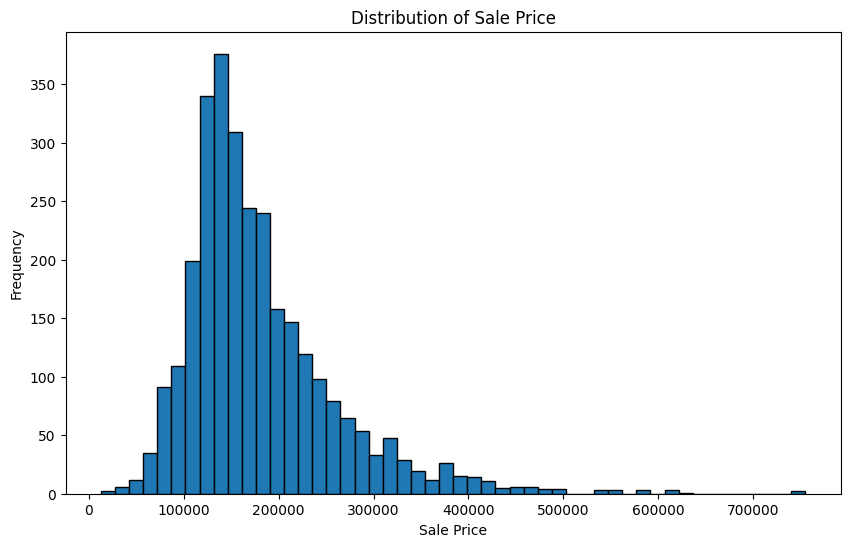

In [6]:
import matplotlib.pyplot as plt

# Using info from 2nd week EDA lesson.. 
# Calculate skewness of SalePrice
skewness = df['saleprice'].skew()
print(f'Skewness: {skewness}')



# Plot histogram to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(df['saleprice'], bins=50, edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()



Skewness after log transformation: -0.014772659537224368


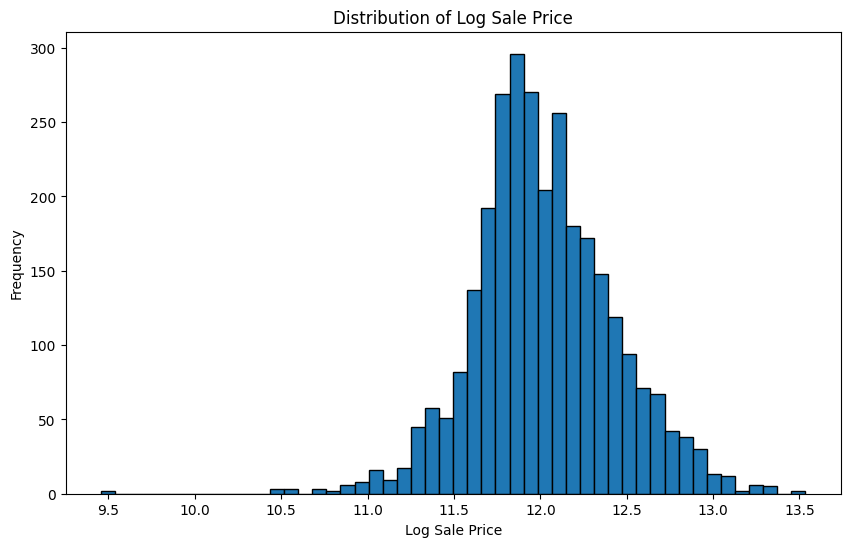

In [7]:
# Looks like SalePrice is highly right skewed, need to use log transformation

log_saleprice = np.log1p(df['saleprice'])

skewness = log_saleprice.skew()
print(f'Skewness after log transformation: {skewness}')


plt.figure(figsize=(10, 6))
plt.hist(log_saleprice, bins=50, edgecolor='black')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log Sale Price')
plt.show()

It looks much better and skewness rating is good as well.
I should go for log1p when i am feature engineering.

In [8]:
df.head(6)

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,None,IR1,Lvl,...,0,None,None,None,0,6,2010,WD,Normal,195500


In [9]:
# Check skewness for all numeric columns
skewness_values = df[numeric_cols].skew().sort_values(ascending=False)

print("Skewness of numeric features:")
with pd.option_context('display.max_rows', None):
    print(skewness_values)



Skewness of numeric features:
misc_val           21.999788
pool_area          16.939142
lot_area           12.820898
low_qual_fin_sf    12.118162
3ssn_porch         11.403795
kitchen_abvgr       4.313825
bsmtfin_sf_2        4.140794
enclosed_porch      4.014446
screen_porch        3.957467
bsmt_half_bath      3.942389
mas_vnr_area        2.619305
open_porch_sf       2.535386
wood_deck_sf        1.842678
saleprice           1.743500
1st_flr_sf          1.469429
bsmtfin_sf_1        1.416421
ms_subclass         1.357579
gr_liv_area         1.274110
total_bsmt_sf       1.150846
bsmt_unf_sf         0.923045
2nd_flr_sf          0.866457
totrms_abvgrd       0.753543
fireplaces          0.739215
half_bath           0.697713
bsmt_full_bath      0.617728
overall_cond        0.574429
bedroom_abvgr       0.305694
garage_area         0.240065
mo_sold             0.192596
overall_qual        0.190634
full_bath           0.171952
yr_sold             0.134862
pid                 0.055886
lot_frontage 

In [10]:
# Identify highly skewed features (absolute skewness > 1)
highly_skewed = skewness_values[abs(skewness_values) > 1]
print(f"\nHighly skewed features ({len(highly_skewed)}):")
print(highly_skewed)


Highly skewed features (20):
misc_val           21.999788
pool_area          16.939142
lot_area           12.820898
low_qual_fin_sf    12.118162
3ssn_porch         11.403795
kitchen_abvgr       4.313825
bsmtfin_sf_2        4.140794
enclosed_porch      4.014446
screen_porch        3.957467
bsmt_half_bath      3.942389
mas_vnr_area        2.619305
open_porch_sf       2.535386
wood_deck_sf        1.842678
saleprice           1.743500
1st_flr_sf          1.469429
bsmtfin_sf_1        1.416421
ms_subclass         1.357579
gr_liv_area         1.274110
total_bsmt_sf       1.150846
garage_yr_blt      -3.916943
dtype: float64


Some of these columns are extremely skewed, so i should decide whether to drop them or not.

I will drop them if they have mostly zero values or very low correalation with the sale price.

But context is important as well, so it's not a good idea to drop them just because of these stats.

I will check what these column names mean : https://www.kaggle.com/datasets/marcopale/housing/data

In [11]:
columns_to_drop = []

for col_name in highly_skewed.index:
    zero_pct = (df[col_name] == 0).sum() / len(df) * 100
    correlation = abs(df[col_name].corr(log_saleprice))
    
    # Drop if: >90% zeros OR correlation < 0.1
    if zero_pct > 90 or correlation < 0.1:
        columns_to_drop.append(col_name)
        print(f"Will drop {col_name}: {zero_pct:.1f}% zeros, correlation: {correlation:.4f}")

Will drop misc_val: 96.5% zeros, correlation: 0.0087
Will drop pool_area: 99.6% zeros, correlation: 0.0544
Will drop low_qual_fin_sf: 98.6% zeros, correlation: 0.0448
Will drop 3ssn_porch: 98.7% zeros, correlation: 0.0402
Will drop bsmtfin_sf_2: 88.0% zeros, correlation: 0.0185
Will drop screen_porch: 91.3% zeros, correlation: 0.1104
Will drop bsmt_half_bath: 94.0% zeros, correlation: 0.0209
Will drop ms_subclass: 0.0% zeros, correlation: 0.0707


After some research i've decided to look deeper into the dataset rather than dropping them straight away...

In [12]:
print(df.utilities.value_counts(), ' \n-------------------------')  # Check unique values in 'utilities' column
print(df.roof_matl.value_counts(), ' \n-------------------------')  # Check unique values in 'roof material' column
print(df.street.value_counts(), ' \n-------------------------')     # Check unique values in 'street' column
print(df.kitchen_abvgr.value_counts(), ' \n-------------------------') # Check unique values in 'kitchen' column

utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64  
-------------------------
roof_matl
CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: count, dtype: int64  
-------------------------
street
Pave    2918
Grvl      12
Name: count, dtype: int64  
-------------------------
kitchen_abvgr
1    2796
2     129
0       3
3       2
Name: count, dtype: int64  
-------------------------


In [13]:
# fix a typo
df = df.rename(columns={'year_remod/add': 'year_remod_add'})

I've decided to drop these since they have almost all single value.

Time for feature engineering:

In [14]:
def add_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # ===== 1. Drop =====
    df = df.drop(columns=['utilities', 'street', 'kitchen_abvgr',  'roof_matl', 'order', 'pid'], errors='ignore')

    # ===== 2. Time & age features =====
    df['house_age'] = df['yr_sold'] - df['year_built']
    df['since_remodel'] = df['yr_sold'] - df['year_remod_add']
    df['is_remodeled'] = (df['year_built'] != df['year_remod_add']).astype(int)

    # sale season from mo_sold
    df['sale_season'] = pd.cut(
        df['mo_sold'],
        bins=[0, 3, 6, 9, 12],
        labels=['winter', 'spring', 'summer', 'fall'],
        include_lowest=True
    )

    # ===== 3. Area & size features =====
    df['total_sf'] = df['total_bsmt_sf'] + df['gr_liv_area']
    df['bsmt_finished_sf'] = df['bsmtfin_sf_1'] + df['bsmtfin_sf_2']
    df['total_porch_sf'] = (
        df['open_porch_sf']
        + df['enclosed_porch']
        + df['3ssn_porch']
        + df['screen_porch']
    )
    df['total_outdoor_sf'] = df['wood_deck_sf'] + df['total_porch_sf']

    # log transforms for skewed areas
    df['lot_area_log'] = np.log1p(df['lot_area'])
    df['gr_liv_area_log'] = np.log1p(df['gr_liv_area'])
    df['total_sf_log'] = np.log1p(df['total_sf'].clip(lower=0))

    # ===== 4. Bathrooms, rooms, ratios =====
    df['total_bath'] = (
        df['bsmt_full_bath']
        + df['full_bath']
        + 0.5 * (df['bsmt_half_bath'] + df['half_bath'])
    )
    df['total_full_bath'] = df['bsmt_full_bath'] + df['full_bath']

    df['bedroom_per_room'] = df['bedroom_abvgr'] / df['totrms_abvgrd'].replace(0, np.nan)
    df['bath_per_bedroom'] = df['total_bath'] / df['bedroom_abvgr'].replace(0, np.nan)
    df['lot_area_per_sf'] = df['lot_area'] / df['total_sf'].replace(0, np.nan)
    df['liv_area_ratio'] = df['gr_liv_area'] / df['total_sf'].replace(0, np.nan)

    # ===== 5. Garage & basement features =====
    df['has_garage'] = (
        (~df['garage_type'].isna()) | (df['garage_area'] > 0)
    ).astype(int)

    df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']
    df.loc[df['garage_yr_blt'].isna(), 'garage_age'] = np.nan

    df['has_bsmt'] = (df['total_bsmt_sf'] > 0).astype(int)

    # ===== 6. Amenity flags =====
    df['has_fireplace'] = (df['fireplaces'] > 0).astype(int)
    df['has_pool'] = (df['pool_area'] > 0).astype(int)
    df['has_2ndfloor'] = (df['2nd_flr_sf'] > 0).astype(int)
    df['has_deck'] = (df['wood_deck_sf'] > 0).astype(int)
    df['has_porch'] = (df['total_porch_sf'] > 0).astype(int)

    # ===== 7. Condition combinations =====
    df['same_condition'] = (df['condition_1'] == df['condition_2']).astype(int)

    # ===== 8. Quality / condition encodings =====
    # Numeric overall qualities: interactions and squares
    df['overall_score'] = df['overall_qual'] * df['overall_cond']
    df['overall_qual_sq'] = df['overall_qual'] ** 2
    df['overall_cond_sq'] = df['overall_cond'] ** 2

    # Ordinal string qualities
    qual_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}

    ord_cols = [
        'exter_qual', 'exter_cond',
        'bsmt_qual', 'bsmt_cond',
        'heating_qc', 'kitchen_qual',
        'fireplace_qu', 'garage_qual',
        'garage_cond', 'pool_qc'
    ]

    for col in ord_cols:
        if col in df.columns:
            df[col + '_num'] = df[col].map(qual_map).fillna(0).astype(int)

    # ===== 9. Rare-category grouping for some categoricals =====
    rare_cat_cols = ['neighborhood', 'exterior_1st', 'exterior_2nd', 'misc_feature']
    for col in rare_cat_cols:
        if col in df.columns:
            freqs = df[col].value_counts(normalize=True)
            rare_labels = freqs[freqs < 0.01].index
            df[col + '_grp'] = df[col].replace(rare_labels, 'Rare')

    # ===== 10. log transform the target =====
    if 'saleprice' in df.columns:
        df['saleprice_log'] = np.log1p(df['saleprice'])

    return df


In [15]:
def add_skew_transforms(df):
    df = df.copy()

    # Log-transform right-skewed continuous features
    log_features = [
        'misc_val', 'pool_area', 'lot_area', 'low_qual_fin_sf',
        '3ssn_porch', 'bsmtfin_sf_2', 'enclosed_porch', 'screen_porch',
        'bsmt_half_bath', 'mas_vnr_area', 'open_porch_sf', 'wood_deck_sf',
        '1st_flr_sf', 'bsmtfin_sf_1', 'gr_liv_area', 'total_bsmt_sf'
    ]
    for col in log_features:
        if col in df.columns:
            df[col + '_log1p'] = np.log1p(df[col])

    # Garage age from year built
    if {'yr_sold', 'garage_yr_blt'}.issubset(df.columns):
        df['garage_age'] = df['yr_sold'] - df['garage_yr_blt']
        df.loc[df['garage_yr_blt'].isna(), 'garage_age'] = np.nan
        df['garage_age_log1p'] = np.log1p(df['garage_age'].clip(lower=0))

    # Target transform (if present)
    if 'saleprice' in df.columns:
        df['saleprice_log'] = np.log1p(df['saleprice'])

    return df


df_fe = add_engineered_features(df)   
df_fe = add_skew_transforms(df_fe)


Let's check the correlation between all numeric features and our target, especially the engineered ones

In [16]:
target = 'saleprice_log'

corr_all = (
    df_fe
    .select_dtypes(include=[np.number])   # numeric features only
    .corr()[target]
    .sort_values(ascending=False)
)

# Absolute correlations (most useful for ranking)
corr_all_abs = corr_all.abs().sort_values(ascending=False)

with pd.option_context('display.max_rows', None):
    print(corr_all_abs)

saleprice_log            1.000000
saleprice                0.946304
overall_qual             0.825645
overall_qual_sq          0.817340
total_sf_log             0.802399
total_sf                 0.779437
gr_liv_area_log          0.723164
gr_liv_area_log1p        0.723164
gr_liv_area              0.695863
exter_qual_num           0.684845
garage_cars              0.674878
kitchen_qual_num         0.666908
total_bath               0.666187
garage_area              0.650767
bsmt_qual_num            0.639611
total_bsmt_sf            0.625622
garage_age_log1p         0.623340
house_age                0.615990
year_built               0.615485
total_full_bath          0.615245
1st_flr_sf_log1p         0.613423
overall_score            0.610701
1st_flr_sf               0.602629
since_remodel            0.588285
year_remod_add           0.586153
full_bath                0.577335
fireplace_qu_num         0.545800
has_fireplace            0.509234
heating_qc_num           0.492916
totrms_abvgrd 

After inspecting the result, i've decided to not include features with less than 0.3 correlation value

In [17]:
engineered_features_to_keep = [
    # --- size / area (combined & log) ---
    "total_sf_log",          # 0.80 – main size feature, log-transformed
    "1st_flr_sf_log1p",      # 0.61 – strong extra info about layout
    "total_bsmt_sf_log1p",   # 0.38 – basement size, log

    # --- quality / condition encodings ---
    "exter_qual_num",        # 0.68
    "kitchen_qual_num",      # 0.67
    "bsmt_qual_num",         # 0.64
    "fireplace_qu_num",      # 0.55
    "heating_qc_num",        # 0.49
    "garage_qual_num",       # 0.36
    "garage_cond_num",       # 0.35

    # --- overall quality interaction ---
    "overall_score",         # 0.61 (overall_qual * overall_cond)

    # --- time / age derived vars ---
    "house_age",             # 0.62 = yr_sold - year_built
    "since_remodel",         # 0.59 = yr_sold - year_remod_add
    "garage_age_log1p",      # 0.62 – age of garage, log

    # --- bathrooms / ratios ---
    "total_bath",            # 0.67 – combines full + half baths
    "bath_per_bedroom",      # 0.40 – density of bathrooms vs bedrooms

    # --- lot & masonry transformed ---
    "lot_area_log1p",        # 0.37 – lot size, log
    "mas_vnr_area_log1p",    # 0.43 – masonry area, log

    # --- basement / finished area combos ---
    "bsmt_finished_sf",      # 0.40 – finished part of basement

    # --- outdoor / amenities ---
    "total_outdoor_sf",      # 0.39 – deck + porches combined
    "open_porch_sf_log1p",   # 0.46 – particularly strong among outdoor parts
    "wood_deck_sf_log1p",    # 0.35
    "has_fireplace",         # 0.51 – presence of fireplace
    "has_deck",              # 0.33
    "has_porch",             # 0.31,
]

raw_numeric_to_keep = [
    "overall_qual",   # 0.83 – single strongest predictor
    "garage_cars",    # 0.67 – capacity
    "garage_area",    # 0.65 – physical size of garage
    "total_bsmt_sf",  # 0.63 – raw basement size
    "totrms_abvgrd",  # 0.49 – total rooms above grade
]

# Training

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    r2_score
)

In [25]:
# 1. features from previous analysis
selected_features = engineered_features_to_keep + raw_numeric_to_keep
target = "saleprice_log"

# 2. check if missing
missing = [f for f in selected_features if f not in df_fe.columns]
if missing:
    print("WARNING - missing features (check your feature engineering):")
    print(missing)

#  drop missing ones instead of crashing:
final_features = [f for f in selected_features if f in df_fe.columns]

print("Using", len(final_features), "features:")
print(final_features)

# 3. Build X, y
X = df_fe[final_features].copy()
y = df_fe[target].copy()

# --- DATA LEAKAGE SAFETY CHECK (drop any accidental saleprice-like cols) ---
leak_cols = [c for c in X.columns if "saleprice" in c.lower()]
if leak_cols:
    print("Dropping potential leakage columns:", leak_cols)
    X = X.drop(columns=leak_cols)
# ---------------------------------------------------------------------------

# handle infs
X = X.replace([np.inf, -np.inf], np.nan)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Define 3 models as pipelines (Imputer + Model)
scoring = "neg_root_mean_squared_error"
cv = 5

models_and_params = [
    (
        "HistGradientBoosting",
        Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("model", HistGradientBoostingRegressor(
                random_state=42,
                early_stopping=True
            )),
        ]),
        {
            "model__learning_rate": [0.03, 0.05],
            "model__max_depth": [4, 6],
            "model__max_leaf_nodes": [31, 63],
            "model__min_samples_leaf": [10, 20],
        }
    ),
    (
        "RandomForest",
        Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("model", RandomForestRegressor(
                random_state=42,
                n_estimators=300
            )),
        ]),
        {
            "model__max_depth": [None, 15, 25],
            "model__min_samples_leaf": [1, 5],
            "model__max_features": [0.3, 0.6, 1.0],
        }
    ),
    (
        "Ridge",
        Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("model", Ridge()),
        ]),
        {
            "model__alpha": [0.1, 1.0, 10.0, 50.0, 100.0],
        }
    ),
]

results = []
best_estimators = {}

# 6. Loop over models, do GridSearchCV, collect CV scores
for name, base_model, param_grid in models_and_params:
    print(f"\n=== Tuning {name} ===")
    grid = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_rmse = -grid.best_score_  # because scoring is neg_root_mse
    best_std = grid.cv_results_["std_test_score"][grid.best_index_]

    print(f"Best params: {grid.best_params_}")
    print(f"CV RMSE (log) mean: {best_rmse:.5f}")
    print(f"CV RMSE (log) std : {best_std:.5f}")

    results.append({
        "model": name,
        "best_params": grid.best_params_,
        "cv_rmse_mean": best_rmse,
        "cv_rmse_std": best_std,
    })

    best_estimators[name] = grid.best_estimator_

# 7. Summary table of CV scores
results_df = pd.DataFrame(results).sort_values("cv_rmse_mean")
print("\n=== CV results summary (sorted by RMSE) ===")
print(results_df)

# 8. Select the best model by CV RMSE
best_model_name = results_df.iloc[0]["model"]
best_model = best_estimators[best_model_name]

print(f"\nBest model by CV RMSE: {best_model_name}")
print(best_model)

# 9. Fit best model on full training set and evaluate on test
best_model.fit(X_train, y_train)

y_pred_log = best_model.predict(X_test)

# Metrics in log-space
rmse_log = root_mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("\nTest metrics (log SalePrice):")
print("RMSE (log):", rmse_log)
print("MAE  (log):", mae_log)
print("R^2  (log):", r2_log)

# Metrics back in original SalePrice scale
y_test_price = np.expm1(y_test)
y_pred_price = np.expm1(y_pred_log)

rmse_price = root_mean_squared_error(y_test_price, y_pred_price)
mae_price = mean_absolute_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

print("\nTest metrics (original SalePrice):")
print("RMSE:", rmse_price)
print("MAE :", mae_price)
print("R^2 :", r2_price)


Using 30 features:
['total_sf_log', '1st_flr_sf_log1p', 'total_bsmt_sf_log1p', 'exter_qual_num', 'kitchen_qual_num', 'bsmt_qual_num', 'fireplace_qu_num', 'heating_qc_num', 'garage_qual_num', 'garage_cond_num', 'overall_score', 'house_age', 'since_remodel', 'garage_age_log1p', 'total_bath', 'bath_per_bedroom', 'lot_area_log1p', 'mas_vnr_area_log1p', 'bsmt_finished_sf', 'total_outdoor_sf', 'open_porch_sf_log1p', 'wood_deck_sf_log1p', 'has_fireplace', 'has_deck', 'has_porch', 'overall_qual', 'garage_cars', 'garage_area', 'total_bsmt_sf', 'totrms_abvgrd']

=== Tuning HistGradientBoosting ===
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__max_leaf_nodes': 63, 'model__min_samples_leaf': 10}
CV RMSE (log) mean: 0.13652
CV RMSE (log) std : 0.00912

=== Tuning RandomForest ===
Best params: {'model__max_depth': None, 'model__max_features': 0.3, 'model__min_samples_leaf': 1}
CV RMSE (log) mean: 0.13574
CV RMSE (log) std : 0.01004

=== Tuning Ridge ===
Best params: {'mo